Notebook for Isomap non-linear dimensionality reduction

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold
import imageio
import glob
import math
from PIL import Image

In [27]:
# Vegtables
veggieFolders = glob.glob('Veg/*')
veggieFolders = [x + '/*.jpg' for x in veggieFolders]
veggies = [x.split('/')[1] for x in veggieFolders]
print("Veggies: ", veggies)
path = 'Veg/'
print(veggieFolders)

Veggies:  ['apple', 'turnip', 'chilli pepper', 'raddish', 'bell pepper', 'pear', 'sweetpotato', 'pomegranate', 'peas', 'capsicum', 'spinach', 'lettuce', 'kiwi', 'lemon', 'onion', 'cauliflower', 'potato', 'jalepeno', 'sweetcorn', 'cucumber', 'paprika', 'watermelon', 'mango', 'cabbage', 'grapes', 'beetroot', 'eggplant', 'corn', 'soy beans', 'banana', 'ginger', 'garlic', 'pineapple', 'tomato', 'orange', 'carrot']
['Veg/apple/*.jpg', 'Veg/turnip/*.jpg', 'Veg/chilli pepper/*.jpg', 'Veg/raddish/*.jpg', 'Veg/bell pepper/*.jpg', 'Veg/pear/*.jpg', 'Veg/sweetpotato/*.jpg', 'Veg/pomegranate/*.jpg', 'Veg/peas/*.jpg', 'Veg/capsicum/*.jpg', 'Veg/spinach/*.jpg', 'Veg/lettuce/*.jpg', 'Veg/kiwi/*.jpg', 'Veg/lemon/*.jpg', 'Veg/onion/*.jpg', 'Veg/cauliflower/*.jpg', 'Veg/potato/*.jpg', 'Veg/jalepeno/*.jpg', 'Veg/sweetcorn/*.jpg', 'Veg/cucumber/*.jpg', 'Veg/paprika/*.jpg', 'Veg/watermelon/*.jpg', 'Veg/mango/*.jpg', 'Veg/cabbage/*.jpg', 'Veg/grapes/*.jpg', 'Veg/beetroot/*.jpg', 'Veg/eggplant/*.jpg', 'Veg/c

In [28]:
# importing data

num_images_per_veggie = 4
samples = []

for folder in veggieFolders:
    print(folder)
    imageNum = 0
    for filename in glob.glob(folder):
        imageNum += 1
        # img = color.rgb2gray(io.imread(filename)[:,:,:3])
        img = Image.open(filename).convert('L')
        img = img.resize((200,200),Image.ANTIALIAS)
        samples.append(np.array(img).reshape(-1))
        # if imageNum == num_images_per_veggie:
        #     break

Veg/apple/*.jpg


/var/folders/4q/h6mrxg6x5tn0mwqnw8_b8jtr0000gn/T/ipykernel_87625/22216506.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((200,200),Image.ANTIALIAS)


Veg/turnip/*.jpg
Veg/chilli pepper/*.jpg
Veg/raddish/*.jpg
Veg/bell pepper/*.jpg
Veg/pear/*.jpg
Veg/sweetpotato/*.jpg
Veg/pomegranate/*.jpg
Veg/peas/*.jpg
Veg/capsicum/*.jpg
Veg/spinach/*.jpg
Veg/lettuce/*.jpg
Veg/kiwi/*.jpg
Veg/lemon/*.jpg
Veg/onion/*.jpg
Veg/cauliflower/*.jpg
Veg/potato/*.jpg
Veg/jalepeno/*.jpg
Veg/sweetcorn/*.jpg
Veg/cucumber/*.jpg
Veg/paprika/*.jpg
Veg/watermelon/*.jpg
Veg/mango/*.jpg
Veg/cabbage/*.jpg
Veg/grapes/*.jpg
Veg/beetroot/*.jpg
Veg/eggplant/*.jpg
Veg/corn/*.jpg
Veg/soy beans/*.jpg
Veg/banana/*.jpg
Veg/ginger/*.jpg
Veg/garlic/*.jpg
Veg/pineapple/*.jpg
Veg/tomato/*.jpg
Veg/orange/*.jpg
Veg/carrot/*.jpg


In [29]:
samples

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([ 71,  68,  65, ..., 102, 104, 109], dtype=uint8),
 array([ 52,  52,  52, ..., 115, 114, 114], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([242, 242, 243, ..., 248, 247, 247], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([135, 135, 135, ..., 182, 181, 181], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([100,  99,  98, ...,  30,  28,  24], dtype=uint8),
 array([141, 140, 140, ..., 190, 191, 191], dtype=uint8),
 array([ 33,  18,  18, ..., 153, 145, 148], dtype=uint8),
 array([201, 205, 208, ...,  65,  69,  41], dtype=uint8),
 array([184, 111,  79, ...,  43,  38,  40], dtype=uint8),
 array([235, 217, 191, ...,  10,  11,   8], dtype=uint8),
 array([141, 140, 140, ..., 190, 191, 191], dtype=uint8),
 array([142, 138, 134, ..., 120, 162, 164], dtype=uint8),
 array([ 89, 103, 112, ..., 120, 127, 120], dtype=uint8),
 array([255, 255, 255, ...

In [30]:
df = pd.DataFrame.from_records(samples, coerce_float=True)
num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))

In [31]:
iso = manifold.Isomap(n_neighbors=5, n_components=2)
iso.fit(df)
manifold_2Da = iso.transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['component1', 'component2'])
manifold_2D.head()

,component1,component2
0,41343.687762,24136.947032
1,-43038.710798,-5974.205026
2,-32426.182820,-4678.772911
3,1601.290232,-10711.426195
4,32433.658696,37457.832998


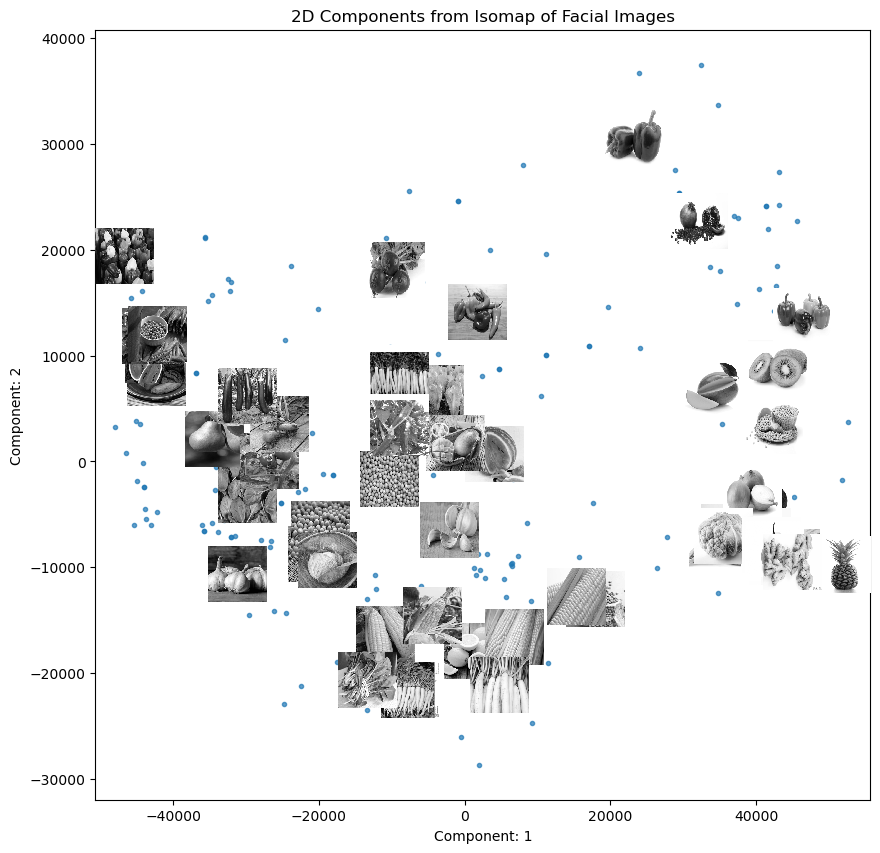

In [32]:
%matplotlib inline
np.random.seed(2)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Vegtable Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['component1']) - min(manifold_2D['component1'])) * 0.08
y_size = (max(manifold_2D['component2']) - min(manifold_2D['component2'])) * 0.08
for i in range(60):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'component1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'component2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'component1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'component2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['component1'], manifold_2D['component2'], marker='.',alpha=0.7)
plt.show()

In [24]:
num_images

700